# Project 4 - Text Classification



# Summary 

This summary briefly introduces the Business and Data Understanding, Data Preparation, Modeling, and Evaluation etc. 

## Business Understanding

One E-commerce company would like to understand customer sentiments on Apple and Google Products, so that they can develop their sales strategy accordingly. They make a request to perform sentiment analysis about these products through the user comments. 

## Data Understanding

We focus on the sentiment of user commments on Twitter. 
Source of the data is from Data Word. The size of the dataset is 1.2 Mb, and it contains 9000 entries of data.  Each entry of the dataset contains the text comments and the labels with Positive/Negative or unknown sentiments.  

## Data Preparation
We would encode the text data into numerical formats for modeling. 
1. We encode the sentiment labels into numerical numbers
2. We encode the text strings as training data

Data Preparation steps include Tokenization, Stop Words Removal, Stemming etc.  Several libraries are used, such as NLTK. 

We use Tfidf methods for feature engineering and encoding based on the frequency of the words 


## Modeling

We develop classifiers for ths multiclass classification problem.  We use iterative approach. 

We first develop a baseline model using Naive Bayse model. Then we would improve this baseline model with data processing techniques such as stop words removal and token stemming etc. We also tune the parameters such as  Increasing number of max features includded in Tfidf feature engineering. 

We cross validate the models to show performace improvement on the metrics. 

## Evaluation 
We develop evaluation metrics to evaluate model performance. Accuracy is used in this project. The Iterative approach and cross validation method shows model improvement

# Project 
## Data Prepration
### Loading the Data

We load in the dataset. We use some data as the training data for our model, and some other data as the testing data to check model performance

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from matplotlib.ticker import MaxNLocator
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.naive_bayes import MultinomialNB

pd.set_option('max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [390]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding= 'unicode_escape')

In [391]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


### Display and Explore  the Dataset Information

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Dataset size 3333 observations

In [393]:
df.drop(columns=['emotion_in_tweet_is_directed_at'], inplace = True)

In [394]:
df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product


#### Check Emotion Counts

In [395]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

#### Convert Emotions

In [396]:
dic = {'Negative emotion':'Negative', 'Positive emotion':'Positive', 'No emotion toward brand or product':'Neutral'}

df['Sentiment'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map(dic)

In [397]:
df['Sentiment'].value_counts()

Neutral     5389
Positive    2978
Negative     570
Name: Sentiment, dtype: int64

### Check Data Distribution
#### User Emotion Distribution

(array([0, 1, 2]),
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive'), Text(2, 0, 'Neutral')])

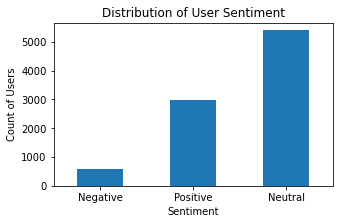

In [398]:
fig, ax = plt.subplots(figsize=(5, 3))

df.Sentiment.value_counts().sort_values().plot(kind = 'bar')

ax.set_xlabel("Sentiment")
ax.set_ylabel("Count of Users")
ax.set_title("Distribution of User Sentiment");
plt.xticks(rotation=0)

#### Missing Sentiment Data

In [399]:
df.isnull().sum()

tweet_text                                              1
is_there_an_emotion_directed_at_a_brand_or_product      0
Sentiment                                             156
dtype: int64

### Drop Unknown Data

In [400]:
df.dropna(inplace=True)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8936 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8936 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  8936 non-null   object
 2   Sentiment                                           8936 non-null   object
dtypes: object(3)
memory usage: 279.2+ KB


## Data Processing

### Dataset Train Test Split

In [402]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=40)

In [403]:
df_train

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,Sentiment
5376,RT @mention Agencies push Google in directions...,Positive emotion,Positive
4987,Are you going to be at #SXSW and wish you coul...,Positive emotion,Positive
8588,google hotpot= yelp killer? Very impressive i...,Positive emotion,Positive
4149,@mention let's go to the apple store and score...,Positive emotion,Positive
8457,It was either go to #SXSW or wait in line and ...,Positive emotion,Positive
...,...,...,...
7973,"In response to Apple's #sxsw pop-up store, I'm...",No emotion toward brand or product,Neutral
3670,Just in time: @mention launch Unofficial #SXSW...,Positive emotion,Positive
6065,RT @mention I was going to mock the tech-nerds...,No emotion toward brand or product,Neutral
5524,"RT @mention At SXSW, Apple schools the marketi...",Positive emotion,Positive


### Data Preprocessing

#### Classification Labels Encoding

In [404]:
dic1 = {'Positive':1, 'Negative':-1, 'Neutral':0}

In [405]:
df_test['Label']= df_test['Sentiment'].map(dic1)
df_train['Label']= df_train['Sentiment'].map(dic1)

In [406]:
df_train.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,Sentiment,Label
5376,RT @mention Agencies push Google in directions...,Positive emotion,Positive,1
4987,Are you going to be at #SXSW and wish you coul...,Positive emotion,Positive,1
8588,google hotpot= yelp killer? Very impressive i...,Positive emotion,Positive,1
4149,@mention let's go to the apple store and score...,Positive emotion,Positive,1
8457,It was either go to #SXSW or wait in line and ...,Positive emotion,Positive,1


#### Standarizing Case in the Full Dataset

In [407]:
df_train['tweet_text'].str.lower()
df_test['tweet_text'].str.lower()

4014    i got turkey! rt @mention random apple fan jus...
3472    @mention hey jen what do you hear about google...
3508    i17: symphony of destruction {link} [codes val...
4529    what iphone apps do i put on screen 1 for #sxs...
360     this will be out of control: #apple set to ope...
                              ...                        
94      wonder if @mention is putting tips from the @m...
8824    woah #sxsw is the buzz word i wake up to!  i h...
1614    @mention @mention not letting interactive in t...
876     alert the media.  i just saw the one and only ...
3407    ipad2 in hand thanks to the popup apple store ...
Name: tweet_text, Length: 2234, dtype: object

#### Tokenizing

In [408]:
basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)

df_train["text_tokenized"] = df_train["tweet_text"].apply(tokenizer.tokenize)
df_test["text_tokenized"] = df_test["tweet_text"].apply(tokenizer.tokenize)

In [409]:
df_train.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,Sentiment,Label,text_tokenized
5376,RT @mention Agencies push Google in directions...,Positive emotion,Positive,1,"[RT, mention, Agencies, push, Google, in, dire..."
4987,Are you going to be at #SXSW and wish you coul...,Positive emotion,Positive,1,"[Are, you, going, to, be, at, SXSW, and, wish,..."
8588,google hotpot= yelp killer? Very impressive i...,Positive emotion,Positive,1,"[google, hotpot, yelp, killer, Very, impressiv..."
4149,@mention let's go to the apple store and score...,Positive emotion,Positive,1,"[mention, let, go, to, the, apple, store, and,..."
8457,It was either go to #SXSW or wait in line and ...,Positive emotion,Positive,1,"[It, was, either, go, to, SXSW, or, wait, in, ..."


### Training Data and Testing Data

In [410]:
text_train, y_train = df_train['text_tokenized'], df_train['Label']
text_test, y_test = df_test['text_tokenized'], df_test['Label']

In [411]:
y_train

5376    1
4987    1
8588    1
4149    1
8457    1
       ..
7973    0
3670    1
6065    0
5524    1
7739    1
Name: Label, Length: 6702, dtype: int64

### Exploratory Data Analysis: Frequency Distributions

In [412]:
def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    

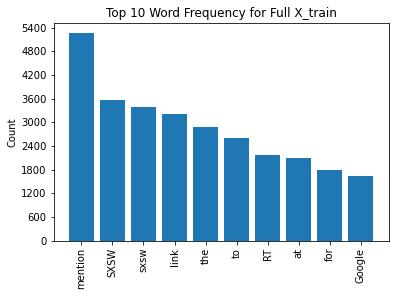

In [413]:
# Create a frequency distribution for X_train
train_freq_dist = FreqDist(df_train["text_tokenized"].explode())

# Plot the top 10 tokens
visualize_top_10(train_freq_dist, "Top 10 Word Frequency for Full X_train")

## Modeling

### Feature Engineering with TFIDF

In [414]:
# Instantiate a vectorizer
tfidf = TfidfVectorizer(max_features=10)

# Fit the vectorizer
X_train_vectorized = tfidf.fit_transform(df_train['tweet_text'])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,at,for,google,ipad,link,mention,rt,sxsw,the,to
0,0.000000,0.000000,0.492769,0.000000,0.000000,0.694741,0.477853,0.214872,0.000000,0.000000
1,0.386087,0.000000,0.000000,0.410327,0.313048,0.000000,0.000000,0.177604,0.000000,0.743657
2,0.000000,0.000000,0.769898,0.000000,0.000000,0.542728,0.000000,0.335714,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.557822,0.000000,0.390330,0.000000,0.241445,0.471874,0.505485
4,0.000000,0.590622,0.000000,0.569390,0.000000,0.000000,0.000000,0.246452,0.000000,0.515967
...,...,...,...,...,...,...,...,...,...,...
6697,0.000000,0.000000,0.000000,0.000000,0.000000,0.812465,0.000000,0.251282,0.000000,0.526079
6698,0.000000,0.678822,0.000000,0.000000,0.499272,0.457923,0.000000,0.283256,0.000000,0.000000
6699,0.000000,0.535415,0.000000,0.258084,0.000000,0.180591,0.248427,0.111708,0.218319,0.701607
6700,0.390111,0.000000,0.000000,0.000000,0.316311,0.580229,0.399090,0.358910,0.350722,0.000000


### Building a Baseline Model

Now, we'll build a baseline model to serve as our baseline classifier model:

In [415]:
# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()

baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
print('Validation Scores:')
baseline_cv

Validation Scores:


array([0.60029828, 0.601044  , 0.60149254, 0.60149254, 0.60074627])

#### recall the class balance

In [416]:
y_train.value_counts(normalize=True)

 0    0.601015
 1    0.333632
-1    0.065354
Name: Label, dtype: float64

If we guessed the sentiment class every time (class Positive and Negative), we would expect about 33% accuracy and below. So when this baseline model is getting 60% accuracy, that is a clear improvement over just guessing. We can try to improve accuracy with more sophisticated preprocessing.

#### Baseline Model Training accurarcy and Testing Accuracy

In [417]:
baseline_model.fit(X_train_vectorized, y_train)
score = baseline_model.score(X_train_vectorized, y_train)
print('Baseline Model Training Score: ', score)

X_test_vectorized = tfidf.transform(df_test["tweet_text"])
basescore_test=baseline_model.score(X_test_vectorized, y_test)
print('Baseline Model Testing Score: ', basescore_test)

Baseline Model Training Score:  0.601014622500746
Baseline Model Testing Score:  0.6087735004476276


### Iteratively Perform and Evaluate Preprocessing and Feature Engineering Techniques

#### Removing Stopwords 


In [418]:
stopwords_list = stopwords.words('english')

In [419]:
def remove_stopwords(token_list):
    """
    remove stop words form the toke list
    """
    stopwords_removed = [token for token in token_list if token not in stopwords_list]
    return stopwords_removed

In [420]:
# Run this cell without changes
df_train["text_without_stopwords"] = df_train["text_tokenized"].apply(remove_stopwords)
df_test["text_without_stopwords"] = df_test["text_tokenized"].apply(remove_stopwords)

In [421]:
df_train.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,Sentiment,Label,text_tokenized,text_without_stopwords
5376,RT @mention Agencies push Google in directions...,Positive emotion,Positive,1,"[RT, mention, Agencies, push, Google, in, dire...","[RT, mention, Agencies, push, Google, directio..."
4987,Are you going to be at #SXSW and wish you coul...,Positive emotion,Positive,1,"[Are, you, going, to, be, at, SXSW, and, wish,...","[Are, going, SXSW, wish, could, purchase, iPad..."
8588,google hotpot= yelp killer? Very impressive i...,Positive emotion,Positive,1,"[google, hotpot, yelp, killer, Very, impressiv...","[google, hotpot, yelp, killer, Very, impressiv..."
4149,@mention let's go to the apple store and score...,Positive emotion,Positive,1,"[mention, let, go, to, the, apple, store, and,...","[mention, let, go, apple, store, score, ipad, ..."
8457,It was either go to #SXSW or wait in line and ...,Positive emotion,Positive,1,"[It, was, either, go, to, SXSW, or, wait, in, ...","[It, either, go, SXSW, wait, line, buy, tricke..."


#### Stemming 



In [422]:
stemmer = SnowballStemmer(language="english")

def stem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [stemmer.stem(token) for token in tokens]

In [423]:
stemmed_stopwords = [stemmer.stem(word) for word in stopwords_list]

Stemming Sentences

In [424]:
print("Original sample:", df_train.iloc[100]["text_tokenized"][:20])
print("Stemmed sample: ", stem_and_tokenize(df_train.iloc[100]["tweet_text"])[:20])

Original sample: ['marissagoogle', 'Sxsw', 'google', 'maps', 'for', 'mobile', 'using', 'vectors', 'is', 'fast', 'and', 'three', 'dimensional']
Stemmed sample:  ['marissagoogl', 'sxsw', 'googl', 'map', 'for', 'mobil', 'use', 'vector', 'is', 'fast', 'and', 'three', 'dimension']


### Model with Stemming and No Stopwords

In [425]:
tfidf = TfidfVectorizer(
    max_features=10,
    stop_words=stemmed_stopwords,
    tokenizer=stem_and_tokenize,
)

X_train_vectorized = tfidf.fit_transform(df_train['tweet_text'])

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,appl,googl,ipad,iphon,link,mention,quot,rt,store,sxsw
0,0.000000,0.492714,0.000000,0.000000,0.000000,0.694636,0.0,0.478027,0.000000,0.214950
1,0.625526,0.000000,0.584065,0.000000,0.449801,0.000000,0.0,0.000000,0.000000,0.255467
2,0.000000,0.769865,0.000000,0.000000,0.000000,0.542684,0.0,0.000000,0.000000,0.335859
3,0.513688,0.000000,0.479640,0.000000,0.000000,0.338985,0.0,0.000000,0.589191,0.209792
4,0.000000,0.000000,0.916193,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.400738
...,...,...,...,...,...,...,...,...,...,...
6697,0.486547,0.000000,0.000000,0.000000,0.000000,0.642149,0.0,0.000000,0.558061,0.198708
6698,0.000000,0.000000,0.000000,0.732861,0.462429,0.424376,0.0,0.000000,0.000000,0.262640
6699,0.000000,0.000000,0.615808,0.000000,0.000000,0.435221,0.0,0.599010,0.000000,0.269351
6700,0.718372,0.000000,0.000000,0.000000,0.258282,0.474056,0.0,0.326231,0.000000,0.293386


In [426]:
print('Validation Score')
stemmed_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
stemmed_cv

Validation Score


array([0.60029828, 0.601044  , 0.60149254, 0.60149254, 0.6       ])

In [427]:
print('Validation Score:')
print("Baseline:                     ", baseline_cv.mean())
print("Stemmed and Stopwords Removed: ", stemmed_cv.mean())

Validation Score:
Baseline:                      0.6010147250325553
Stemmed and Stopwords Removed:  0.600865471301212


The Model with Stemming doesn't show clear improvement on accuracy

#### Model Training and Testing Accuracy

In [428]:
baseline_model.fit(X_train_vectorized, y_train)
score = baseline_model.score(X_train_vectorized, y_train)
print('Stemmed Model Training Score: ', score)

X_test_vectorized = tfidf.transform(df_test["tweet_text"])
Stemscore_test=baseline_model.score(X_test_vectorized, y_test)
print('Stemmed Model Testing Score: ', Stemscore_test)

Stemmed Model Training Score:  0.601014622500746
Stemmed Model Testing Score:  0.6087735004476276


### Model with  Increasing max_features

In [429]:
tfidf = TfidfVectorizer(
    max_features=100,
    stop_words=stemmed_stopwords,
    tokenizer=stem_and_tokenize
)

X_train_vectorized = tfidf.fit_transform(df_train['tweet_text'])

# pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

In [430]:
print('Validation Score')
Feature_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
Feature_cv

Validation Score


array([0.62788963, 0.63012677, 0.64104478, 0.61492537, 0.63731343])

In [431]:
print("Baseline:         ", baseline_cv.mean())
print("Increased Featrue:", Feature_cv.mean())

Baseline:          0.6010147250325553
Increased Featrue: 0.630259997551393


#### Model Training and Testing Accuracy

In [432]:
baseline_model.fit(X_train_vectorized, y_train)
score = baseline_model.score(X_train_vectorized, y_train)
print('Featured Model Training Score: ', score)

X_test_vectorized = tfidf.transform(df_test["tweet_text"])
Featurescore_test=baseline_model.score(X_test_vectorized, y_test)
print('Featured Model Testing Score: ', Featurescore_test)

Featured Model Training Score:  0.6365264100268576
Featured Model Testing Score:  0.6414503133393017


###  Model with Max Feature 

In [433]:
tfidf = TfidfVectorizer(
    max_features=250,
    stop_words=stemmed_stopwords,
    tokenizer=stem_and_tokenize
)

X_train_vectorized = tfidf.fit_transform(df_train['tweet_text'])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,10,11,12,2011,30,6th,action,alreadi,also,amp,android,announc,anoth,anyon,app,appl,around,art,ask,attend,austin,avail,away,awesom,back,base,begin,best,better,big,bing,blackberri,block,booth,bring,build,busi,buy,call,case,cc,check,circl,code,com,come,compani,confer,congress,connect,cool,could,day,demo,design,detail,develop,digit,download,downtown,els,even,event,ever,everi,everyon,facebook,far,fast,fb,featur,find,first,follow,foursquar,free,friend,fun,futur,game,geek,get,give,go,good,googl,got,great,group,gsdm,gt,guy,hand,head,heard,help,hey,hootsuit,hope,hotpot,hour,includ,interact,interest,interfac,ipad,ipad2,iphon,itun,japan,join,keep,know,laptop,last,launch,let,like,line,link,live,locat,long,look,lot,love,made,major,make,mani,map,marissa,market,may,mayer,media,meet,mention,might,mobil,much,music,need,network,new,news,next,nice,night,oh,one,open,pack,panel,parti,peopl,person,phone,photo,physic,pic,place,platform,play,pleas,pop,popup,possibl,post,present,product,quot,rank,readi,realli,releas,right,rt,rumor,save,say,schedul,search,see,sell,servic,session,set,share,shop,show,sign,smart,social,someon,speak,start,still,stop,store,street,sure,sxsw,sxswi,tablet,take,talk,team,tech,technolog,temp,temporari,thank,thing,think,time,today,tomorrow,tonight,tri,tv,tweet,twitter,two,uberguid,ubersoci,updat,us,use,user,via,video,view,wait,want,watch,way,web,week,well,white,win,wonder,work,world,would,year,yes,yet,ûï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.266600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.375857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.258652,0.000000,0.0,0.571538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.116306,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.616906,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135071,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.313131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227187,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.126119,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.097127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.626262,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.055164,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.641486,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0

In [434]:
print('Validation Score')
Final_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
Final_cv

Validation Score


array([0.63310962, 0.6442953 , 0.65746269, 0.64701493, 0.65223881])

In [435]:
print("Increased Featured score: ", Feature_cv.mean())
print("Max Feature score:        ", Final_cv.mean())

Increased Featured score:  0.630259997551393
Max Feature score:         0.6468242679221343


### Build  a Final Predictive Classifier  Model



Choose Model with 250 Max Features, with Word Stemming and StopWords removed

#### Model Training Accuracy 

In [436]:
final_model = MultinomialNB()

final_model.fit(X_train_vectorized, y_train)

print('Training Accuracy')
final_model.score(X_train_vectorized, y_train)

Training Accuracy


0.6609967173977918

## Model Prediction

We make model prediction on the test set

In [437]:
X_test_vectorized = tfidf.transform(df_test["tweet_text"])
final_score = final_model.score(X_test_vectorized, y_test)
print('Model prediction Accuracy', final_score)

Model prediction Accuracy 0.6508504923903312


## Results Summary

In [438]:
df_results = pd.DataFrame()

In [439]:
df_results['Model'] = ['Baseline', '100 Features, Stemming', '250 Features, Stemming ']
df_results['Accuracy'] = [basescore_test, Featurescore_test, final_score]

### Models with Improvement

In [440]:
df_results

,Model,Accuracy
0,Baseline,0.608774
1,"100 Features, Stemming",0.641450
2,"250 Features, Stemming",0.650850


## Model Evaluation and Interpretation


### Recommendations

The Business Stakeholders can use our predictive model to predict and forecast the customers sentiment on Apple and Google products and make business decisions.  However, Further research and study are needed to improve prediction accuracy. 

### Limitations

The model accuracy is at 65%, which is not the best practice and it needs further improvements. 

### Next Steps for Modeling

 1. Feature Engineering, develop more features with domain knowledge
 2. More data needed to improve model performance
 3. More advanced models such as non-linear models like random forest.  Deep Neural Network models could be a good option as well